In [1]:
 # Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install roboflow

from roboflow import Roboflow
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="zFQnSt2437Ig6aCAtSZ4", model_format="clip")
dataset = rf.workspace("yulia-pratiwi-45vut").project("derma").version(1).download(location="/content/Dermalysis")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/Dermalysis in clip:: 100%|██████████| 3495/3495 [00:01<00:00, 3236.89it/s]


In [3]:
# cacar air
import os
folder_path = ('/content/Dermalysis/train/CacarAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [4]:
# Jamur Kuku
import os
folder_path = ('/content/Dermalysis/train/JamurKuku')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [5]:
# Jerawat
import os
folder_path = ('/content/Dermalysis/train/Jerawat')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [6]:
# Kurap
import os
folder_path = ('/content/Dermalysis/train/Kurap')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [7]:
# Kutu Air
import os
folder_path = ('/content/Dermalysis/train/KutuAir')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [8]:
from pathlib import Path
image_dir = Path('/content/Dermalysis/train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [9]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath     Label
0  /content/Dermalysis/train/CacarAir/chickenpox_...  CacarAir
1  /content/Dermalysis/train/Kurap/53_FU-ringworm...     Kurap
2  /content/Dermalysis/train/Jerawat/acne-993_jpg...   Jerawat

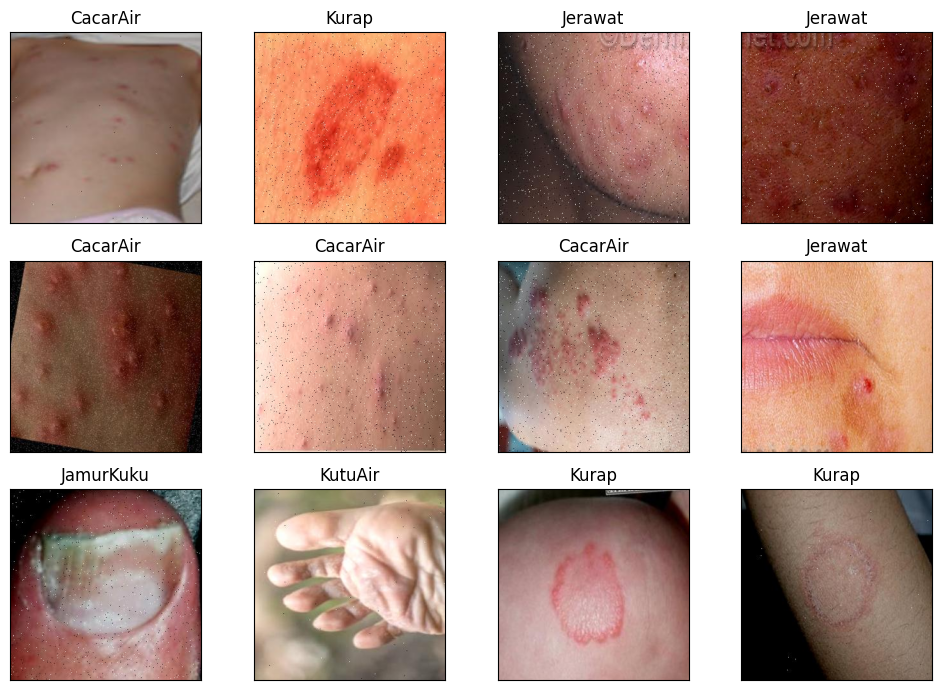

In [10]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



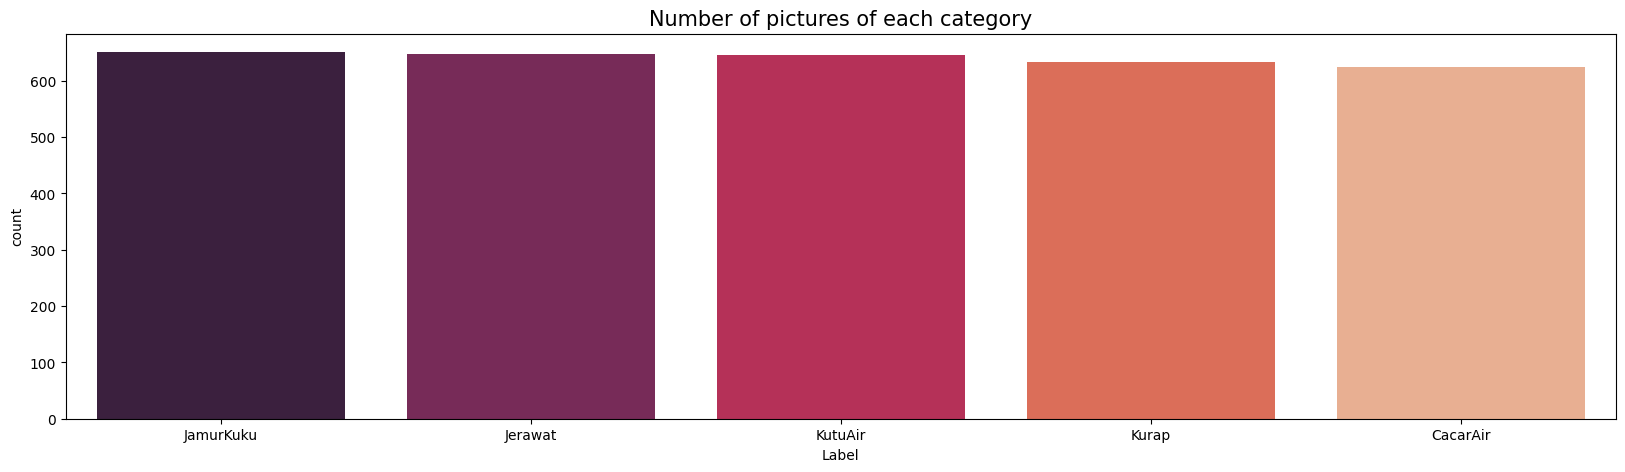

In [11]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [12]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [13]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )


Found 2560 validated image filenames belonging to 5 classes.
Found 641 validated image filenames belonging to 5 classes.


In [14]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-04 01:41:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  22.3MB/s    in 4.1s    

2024-06-04 01:41:14 (20.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [15]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)


from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (416, 416, 3),
                                include_top = False,
                                input_tensor=model_input,
                                weights = "imagenet")

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = True

87910968/87910968 [==============================] - 4s 0us/step


In [16]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalizati

In [17]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 11, 11, 2048)


In [18]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)

# Append the dense network to the base model
inception = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 207, 207, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 207, 207, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 207, 207, 32)         0         ['batch_normalization[0][0

In [19]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/ens2_inception/inception.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [21]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks= myCallback()
inception.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
history_inception = inception.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/32,
                  validation_steps=validasi_data.n/32,
                  epochs=10,
                  callbacks=[callbacks, checkpoint_callback])


Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 3.5187 - accuracy: 0.3094
Epoch 1: loss improved from inf to 3.51871, saving model to /content/drive/MyDrive/ens2_inception/inception.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


80/80 [==============================] - 153s 1s/step - loss: 3.5187 - accuracy: 0.3094 - val_loss: 1.3742 - val_accuracy: 0.4464
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.5977
Epoch 2: loss improved from 3.51871 to 1.00545, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 113s 1s/step - loss: 1.0055 - accuracy: 0.5977 - val_loss: 0.9191 - val_accuracy: 0.6399
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.7992
Epoch 3: loss improved from 1.00545 to 0.54868, saving model to /content/drive/MyDrive/ens2_inception/inception.h5
80/80 [==============================] - 119s 1s/step - loss: 0.5487 - accuracy: 0.7992 - val_loss: 0.3833 - val_accuracy: 0.8542
Epoch 4/10
80/80 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.8672
Epoch 4: loss improved from 0.54868 to 0.41814, saving model to /content/drive/MyDrive/ens2_incept

In [23]:
MODEL_BASE_PATH = "/content/drive/MyDrive/ens2_inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "ens_inceptionv.1.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
inception.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/ens2_inception/H5/ens_inceptionv.1.h5...


In [24]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


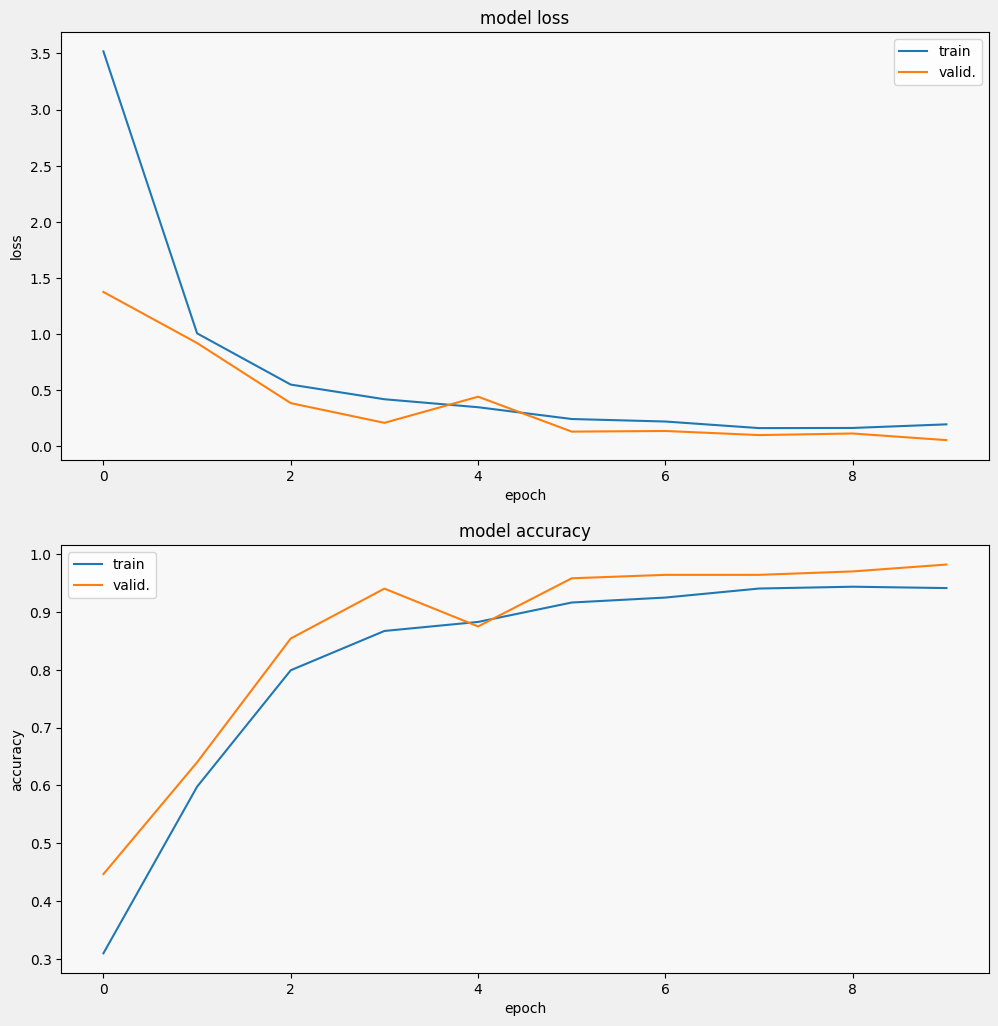

In [25]:
#display
display_training_curves(
    history_inception.history['loss'],
    history_inception.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_inception.history['accuracy'],
    history_inception.history['val_accuracy'],
    'accuracy', 212)

In [26]:
# Predict the label of the test_images
import numpy as np
pred = inception.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:4]}')

41/41 [==============================] - 9s 164ms/step
The first 5 predictions: ['Kurap', 'Jerawat', 'Jerawat', 'JamurKuku']


In [27]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    CacarAir       0.94      0.97      0.96       120
   JamurKuku       0.98      1.00      0.99       134
     Jerawat       0.99      0.95      0.97       150
       Kurap       0.98      0.98      0.98       102
     KutuAir       0.99      0.99      0.99       135

    accuracy                           0.98       641
   macro avg       0.98      0.98      0.98       641
weighted avg       0.98      0.98      0.98       641



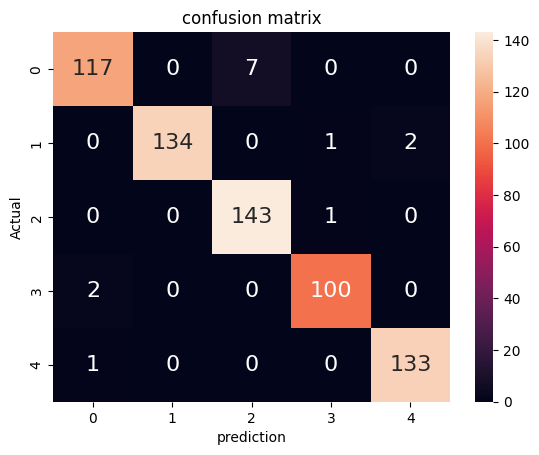

In [28]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(5)],
                  columns = [i for i in range(5)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

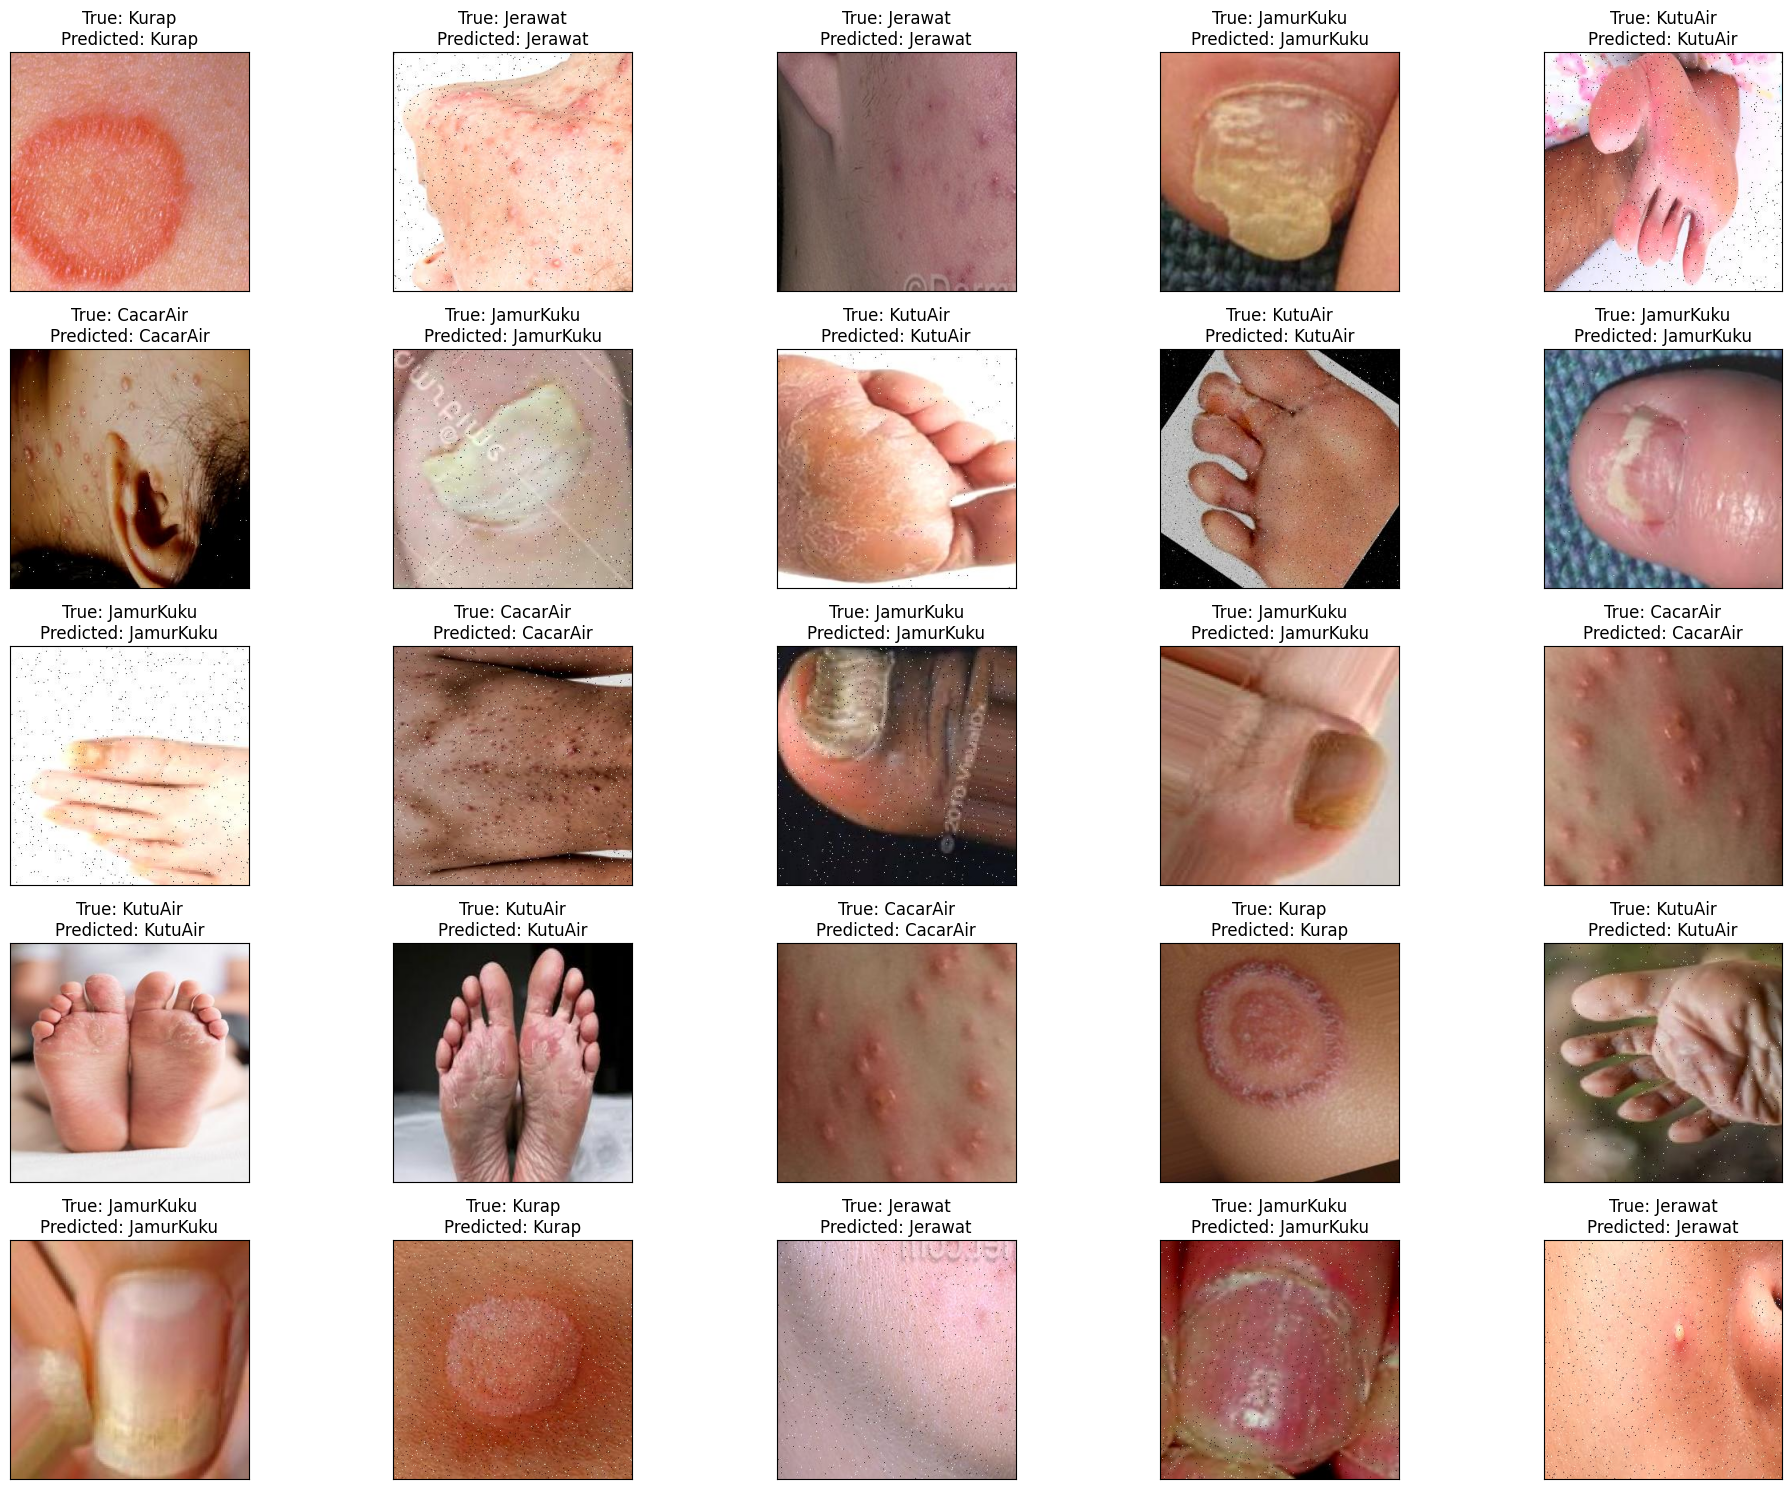

In [29]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

FileUpload(value={}, accept='image/*', description='Upload')

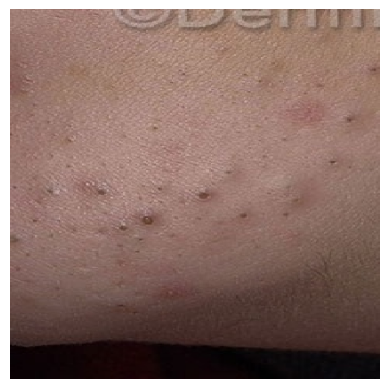

1/1 [==============================] - 0s 49ms/step
Predicted Label for acne.463.jpg: Jerawat


In [38]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Define class labels
class_labels = ['Cacar Air', 'Jamur Kuku', 'Jerawat', 'Kurap', 'Kutu Air']

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(416, 416))  # Adjusted size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
    return img_array

def predict_image(image_path):
    img_array = load_and_preprocess_image(image_path)
    single_prediction = inception.predict(img_array)  # Use the correct model
    predicted_class = np.argmax(single_prediction, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label

# File upload widget
upload_widget = widgets.FileUpload(accept='image/*', multiple=False)
def on_file_upload_change(change):
    for filename, file_info in upload_widget.value.items():
        with open(filename, 'wb') as f:
            f.write(file_info['content'])
        # Display the uploaded image
        img = image.load_img(filename, target_size=(416, 416))  # Adjusted size
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Make a prediction
        predicted_label = predict_image(filename)
        print(f"Predicted Label for {filename}: {predicted_label}")

upload_widget.observe(on_file_upload_change, names='value')
display(upload_widget)

In [1]:
pip install tensorflowjs


In [4]:
import os
import subprocess

MODEL_BASE_PATH = "/content/drive/MyDrive/ens2_inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "ens_inceptionv.1.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
tfjs_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, "tfjs_model")

# Membuat direktori jika belum ada
if not os.path.exists(tfjs_model_path):
    os.makedirs(tfjs_model_path)

# Mengonversi model ke format TensorFlow.js
subprocess.run([
    'tensorflowjs_converter',
    '--input_format=keras',
    '--output_format=tfjs_graph_model',
    save_model_path,
    tfjs_model_path
])

print(f'Model telah disimpan dalam format TensorFlow.js di {tfjs_model_path}')


Model telah disimpan dalam format TensorFlow.js di /content/drive/MyDrive/ens2_inception/H5/tfjs_model


In [ ]:
import tensorflow as tf

MODEL_BASE_PATH = "/content/drive/MyDrive/ens2_inception/"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "ens_inceptionv.1.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
tflite_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, "model.tflite")

# Muat model dari file .h5
model = tf.keras.models.load_model(save_model_path)

# Buat converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Konversi model
tflite_model = converter.convert()

# Simpan model TFLite
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'Model telah disimpan dalam format TensorFlow Lite di {tflite_model_path}')
